In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [93]:
df = pd.read_csv("../data/covid19.csv")
df.tail()

,date,newcase,death
77,03/18/2020,35,0
78,03/19/2020,60,0
79,03/20/2020,50,0
80,03/21/2020,89,0
81,03/22/2020,188,0


In [94]:
df = df[(df.index >= 68)]
# ใช้ตั้งแต่ 67 เป็นต้นไป

e:\workspace\machine_learning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


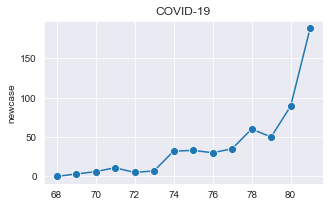

In [95]:
plt.figure(figsize=(5, 3))
sns.lineplot(df.index, 'newcase', data=df, marker='o', markersize=8)
plt.title('COVID-19')
plt.show()

In [96]:
# x เลขวันที่ y จำนวนผู้ติดเชื้อ
# df = df[(df.index <= 75)]
x2 = df.index.values.reshape(-1,1)
y2 = df.newcase

df2 = df[(df.index <= 75)]
x = df2.index.values.reshape(-1,1)
y = df2.newcase
x[:5] , y[:5]
print(x)
print(y)

[[68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]]
68     0
69     3
70     6
71    11
72     5
73     7
74    32
75    33
Name: newcase, dtype: int64


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

[[75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]]


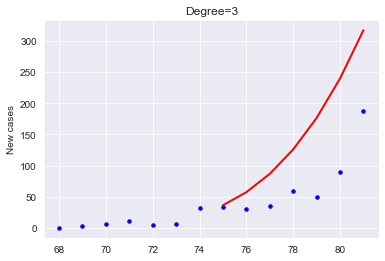

In [98]:
df = df[(df.index >= 75)]
x3 = df.index.values.reshape(-1,1)
print(x3)
x_poly2 = poly_features.fit_transform(x3)
y_poly_pred = model.predict(x_poly2)

sns.set_style('darkgrid')


plt.scatter(x2, y2, color='b',s=12)
plt.plot(x3, y_poly_pred, linewidth='2', color='r')
plt.ylabel('New cases')
plt.title('Degree=3')
plt.show()